<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Gender-vs-Heart-Disease" data-toc-modified-id="Gender-vs-Heart-Disease-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gender vs Heart Disease</a></span></li><li><span><a href="#Thal-vs-Heart-Disease" data-toc-modified-id="Thal-vs-Heart-Disease-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Thal vs Heart Disease</a></span></li><li><span><a href="#Age-vs-Heart-Disease" data-toc-modified-id="Age-vs-Heart-Disease-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Age vs Heart Disease</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Model-Base" data-toc-modified-id="Model-Base-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model Base</a></span></li><li><span><a href="#Model-Tuning" data-toc-modified-id="Model-Tuning-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model Tuning</a></span></li><li><span><a href="#Best-Model" data-toc-modified-id="Best-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Best Model</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

<font size="6">**Final Project Submission**</font>


Please fill out:
* Student name: Andy Peng
* Student pace: part time
* Scheduled project review date/time: Monday. July 13, 2020
* Instructor name: Eli Thomas
* Blog post URL:

I am tasked to investigate heart diseases for a hospital. For this project we will be looking at a data set of patients in a hospital some with heart diseases and some without heart diseases. The main goal of this project is to keep an eye out for certain features that will allow us to categorize this patient as having heart disease.

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    # Your code here
    best_score = 0
    best_k = 0
    
    for i in range(min_k, max_k+1, 2):    
        # Instantiate KNeighborsClassifier
        clf = KNeighborsClassifier(n_neighbors=i)

        # Fit the classifier
        clf.fit(X_train_transformed, y_train)

        # Predict on the test set
        test_preds = clf.predict(X_test_transformed)
        val = f1_score(y_test, test_preds)
        if val > best_score:
            best_score = val
            best_k = i
        else:
            pass
    print('Best Value for k:', best_k)
    print('F1-Score:', best_score)
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [2]:
df = pd.read_csv('datasets_33180_43520_heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Checking for Null Values
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

<font size="5">**Column Descriptions**</font>
* age
* sex
  * 1: Male
  * 0: Female
* chest pain type (4 values) (cp)
  * Value 0: asymptomatic

  * Value 1: atypical angina

  * Value 2: non-anginal pain

  * Value 3: typical angina

* resting blood pressure (trestbps)
* serum cholestoral in mg/dl (chol)
* fasting blood sugar > 120 mg/dl (fbs)
  * 0: False
  * 1: True
* resting electrocardiographic results (values 0,1,2) (restecg)
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria

  * Value 1: normal

  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* maximum heart rate achieved (thalach)
* exercise induced angina (exang)
  * 1: Yes
  * 0: No
* oldpeak = ST depression induced by exercise relative to rest 
* the slope of the peak exercise ST segment (slope)

  * 0: downsloping

  * 1: flat

  * 2: upsloping
* number of major vessels (0-3) colored by flourosopy (ca)
* thal: thallium stress result
  * 1: fixed defect; 

  * 2: normal; 

  * 3: reversible defect
* target
  * 0: disease
  
  * 1: No disease
  
For further documentation please refer to this [link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [4]:
df.target = df.target.replace({0:1, 1:0})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


The code above is use to swap the target values around so that we can easily interpret the data.

* 0: No Disease

* 1: Disease

In [5]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

We see that ca which represents the number of major vessels colored by flourosopy has values of 4, when the values are suppose to go from 0-3. Therefore we will be dropping these 5 data points.

In [6]:
df = df[df.ca != 4]

In [7]:
df.thal.value_counts()

2    163
3    115
1     18
0      2
Name: thal, dtype: int64

According to the research of our data set, thal which represents Thalium, a radioactive tracer injected during a stress test. This chemical combined with a camera to take an image of the heart is used to detect the status of your heart. As mentioned above values 1, 2 and 3 are used only. Therefore we will be dropping the 2 values of 0.

In [8]:
df = df[df.thal != 0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
age         296 non-null int64
sex         296 non-null int64
cp          296 non-null int64
trestbps    296 non-null int64
chol        296 non-null int64
fbs         296 non-null int64
restecg     296 non-null int64
thalach     296 non-null int64
exang       296 non-null int64
oldpeak     296 non-null float64
slope       296 non-null int64
ca          296 non-null int64
thal        296 non-null int64
target      296 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


We need to convert the following variables to categorical variables.

* sex
* chest pain type (cp)
* fasting blood sugar > 120 mg/dl (fbs)
* resting electrocardiographic results (restecg)
* exercise induced angina (exang)
* the slope of the peak exercise ST segment (slope)
* number of major vessels (0-3) colored by flourosopy (ca)
* thal
* target

In [10]:
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for column in cat:
    df[column] = pd.Categorical(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
age         296 non-null int64
sex         296 non-null category
cp          296 non-null category
trestbps    296 non-null int64
chol        296 non-null int64
fbs         296 non-null category
restecg     296 non-null category
thalach     296 non-null int64
exang       296 non-null category
oldpeak     296 non-null float64
slope       296 non-null category
ca          296 non-null category
thal        296 non-null category
target      296 non-null category
dtypes: category(9), float64(1), int64(4)
memory usage: 17.5 KB


In [11]:
# Now to create dummy variables.
target = df.target
features = df.drop(columns = ['target'], axis = 1)
features = pd.get_dummies(features)
viz_df = pd.concat([features, target], axis = 1)

In [12]:
viz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 29 columns):
age          296 non-null int64
trestbps     296 non-null int64
chol         296 non-null int64
thalach      296 non-null int64
oldpeak      296 non-null float64
sex_0        296 non-null uint8
sex_1        296 non-null uint8
cp_0         296 non-null uint8
cp_1         296 non-null uint8
cp_2         296 non-null uint8
cp_3         296 non-null uint8
fbs_0        296 non-null uint8
fbs_1        296 non-null uint8
restecg_0    296 non-null uint8
restecg_1    296 non-null uint8
restecg_2    296 non-null uint8
exang_0      296 non-null uint8
exang_1      296 non-null uint8
slope_0      296 non-null uint8
slope_1      296 non-null uint8
slope_2      296 non-null uint8
ca_0         296 non-null uint8
ca_1         296 non-null uint8
ca_2         296 non-null uint8
ca_3         296 non-null uint8
thal_1       296 non-null uint8
thal_2       296 non-null uint8
thal_3       296 non-null uin

# Visualizations

## Gender vs Heart Disease

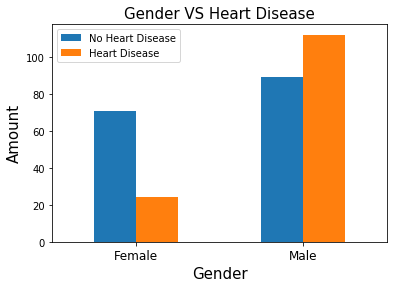

In [13]:
ct = pd.crosstab(df.sex, df.target)
ct.plot.bar()
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.title('Gender VS Heart Disease', fontsize = 15)
#Change the x axis labels from 0 & 1 to female and male
gender_ticks = ['Female', 'Male']
plt.xticks([0, 1], gender_ticks, rotation = 0, fontsize = 12)
#Change the target labels to disease or no disease
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')
plt.show()

We can see above that there are more males than females that have heart disease. Now let's investigate more on what feature stands out more in the individuals with heart disease.

In [14]:
df_disease = df[df['target'] == 1]

In [15]:
# Female
df_disease[df_disease['sex'] == 0].cp.value_counts()

0    21
1     2
2     1
3     0
Name: cp, dtype: int64

In [16]:
# Male
df_disease[df_disease['sex'] == 1].cp.value_counts()

0    81
2    17
3     7
1     7
Name: cp, dtype: int64

The value counts for chest pain in individuals with heart disease is shown above. We can see that the value 0 or Asymptomatic chest pains appear the most in individuals with heart disease. And the graph below we can see that individuals with heart disease tend to have asymptomatic chest pains.

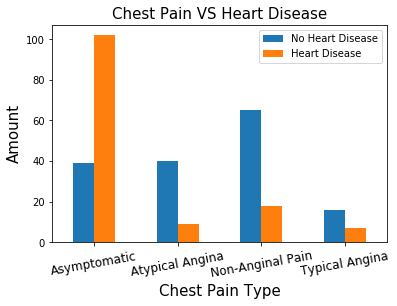

In [17]:
ct = pd.crosstab(df.cp, df.target)
ct.plot.bar()
plt.xlabel('Chest Pain Type', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.title('Chest Pain VS Heart Disease', fontsize = 15)
gender_ticks = ['Asymptomatic', 'Atypical Angina', 'Non-Anginal Pain', 'Typical Angina']
plt.xticks([0, 1, 2, 3], gender_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

## Thal vs Heart Disease

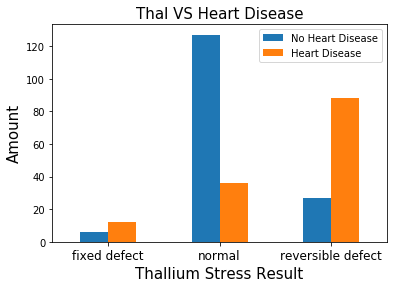

In [18]:
ct = pd.crosstab(df.thal, df.target)
ct.plot.bar()
plt.xlabel('Thallium Stress Result', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.title('Thal VS Heart Disease', fontsize = 15)
gender_ticks = ['fixed defect', 'normal', 'reversible defect']
plt.xticks([0, 1, 2], gender_ticks, rotation = 0, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

The bar graph above shows that individuals with thalium stress result as reversable defect tend to have a higher chance of having heart disease.

## Age vs Heart Disease

Text(0, 0.5, 'Target')

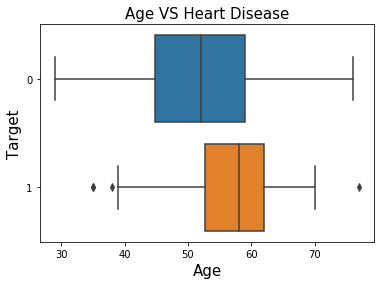

In [19]:
sns.boxplot(x='age',y='target',data=df)
plt.title('Age VS Heart Disease', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Target', fontsize = 15)

We can see in the above graph that people with heart disease tend to be in older people. The lower interquartile range, median and the upper interquartile range tend to be higher than those of no disease. I then thought what comes along with old age, and wanted to investigate the maximum heart rate (thalach).

Text(0, 0.5, 'Target')

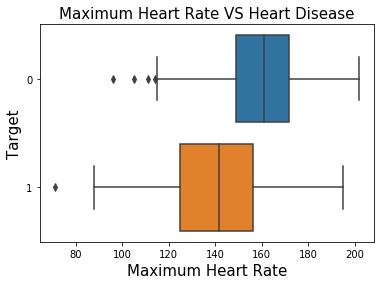

In [20]:
sns.boxplot(x='thalach',y='target',data=df)
plt.title('Maximum Heart Rate VS Heart Disease', fontsize = 15)
plt.xlabel('Maximum Heart Rate', fontsize = 15)
plt.ylabel('Target', fontsize = 15)

We see that people with heart disease do have a lower maximum heart rate.

C:\Users\andyp\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


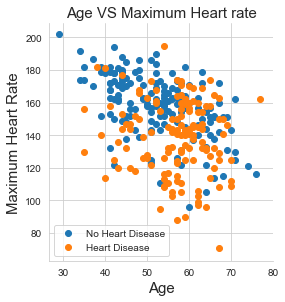

In [21]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="target", size=4) \
   .map(plt.scatter, "age", "thalach")
plt.title('Age VS Maximum Heart rate', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Maximum Heart Rate', fontsize = 15)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')
plt.show()

Now let's look at a scatter plot of age versus the maximum heart rate grouped by people with heart disease. As you can see above as you get older, your maximum heart rate decreases. Notice that majority of the people with heart disease tend to have a lower maximum heart rate and are older.

# Modeling

In [22]:
X_train , X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12)

In [23]:
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

We want lower amount of False Negatives because we don't want to say that they don't have heart disease when they do have heart disease.

## Model Base

In [24]:

# Create a dictionary of classifiers
clf_dict = {
    'Logistic Regression': LogisticRegression(random_state = 10),
    'K-Nearest Neighbours': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = 10),
    'Random Forrest': RandomForestClassifier(random_state = 10),
    'XGBoost' : XGBClassifier()
}

In [25]:
# Define function to batch classify

def batch_clf(X_train, y_train, X_test, y_test, clf_dict):
    '''
    Fits a dictionary of classifiers, makes predictions, plots ROC, returns metrics
    
    Args:
        X_train: {array-like, sparse matrix} of shape (n_samples, n_features) train input values
        y_train: array-like of shape (n_samples,) train target values
        X_test: {array-like, sparse matrix} of shape (m_samples, m_features) test input values
        y_test: array-like of shape (m_samples,) test target values
        clf_dict: dictionary with key name of classifier and value classifier instance
        
    Returns:
        Results dataframe
    '''
    # Create empty DataFrame to store results
    train_acc_scores = []
    test_acc_scores = []
    train_f1_scores = []
    test_f1_scores = []
    train_precision_scores = []
    test_precision_scores = []
    train_recall_scores = []
    test_recall_scores = []
    test_roc_data = []
    auc_scores = []
    
    # Loop through dictionary items
    for key, clf in clf_dict.items():

        # Fit classifier
        clf_fitted = clf.fit(X_train,y_train)
        
        # Get Predictions
        train_preds = clf_fitted.predict(X_train)
        test_preds = clf_fitted.predict(X_test)
  
        
        #Get accuracy scores
        train_acc = accuracy_score(y_train, train_preds)
        train_acc_scores.append(round(train_acc,2))
        test_acc = accuracy_score(y_test, test_preds)
        test_acc_scores.append(round(test_acc,2))
        
        #Get F1 Scores
        train_f1 = f1_score(y_train, train_preds)
        train_f1_scores.append(round(train_f1,2))
        test_f1 = f1_score(y_test, test_preds)
        test_f1_scores.append(round(test_f1,2))
        
        # Get Precision Scores
        train_precision = precision_score(y_train, train_preds)
        train_precision_scores.append(round(train_precision,2))
        test_precision = precision_score(y_test, test_preds)
        test_precision_scores.append(round(test_precision,2))
        
        # Get Recall Scores
        train_recall = recall_score(y_train, train_preds)
        train_recall_scores.append(round(train_recall,2))
        test_recall = recall_score(y_test, test_preds)
        test_recall_scores.append(round(test_recall,2))
        
        # Get Probability Predictions
        test_hat = clf_fitted.predict_proba(X_test)
        test_proba = test_hat[:,1]
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_proba)
        test_roc_data.append([fpr_test, tpr_test, thresholds_test])
        
        # AUC
        auc_test = auc(fpr_test, tpr_test)
        auc_scores.append(auc_test)
    # Create results dataframe
    results = pd.DataFrame({'Model': list(clf_dict.keys()), 
                            'Train Accuracy': train_acc_scores,
                            'Test Accuracy': test_acc_scores, 
                            'Train F1': train_f1_scores,
                            'Test F1': test_f1_scores,
                            'Train Precision' : train_precision_scores,
                            'Test Precision' : test_precision_scores,
                            'Train Recall': train_recall_scores,
                            'Test Recall': test_recall_scores,
                            'AUC Score': auc_scores
                            })
    
   # Plot side by side ROC curve
    fig, ax = plt.subplots(figsize = (10,8))
    
    for i in range(len(test_roc_data)):
        ax.plot(test_roc_data[i][0], test_roc_data[i][1], lw=4, \
                 label= f'{list(clf_dict.keys())[i]}')    
        
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.set_title('Receiver operating characteristic (ROC) Curve \n Test Set')
    plt.show()

    return results

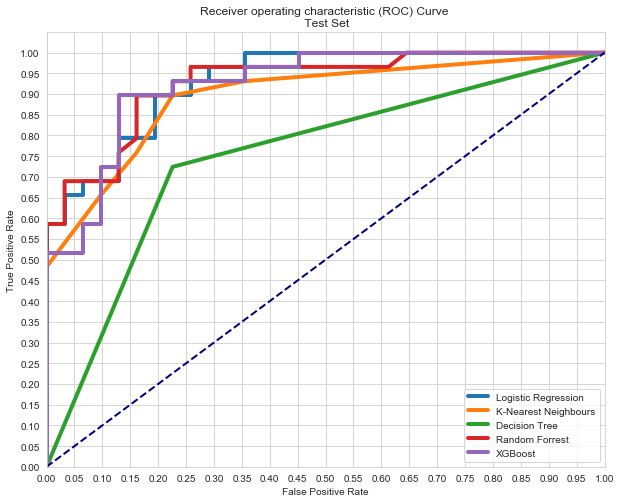

,Model,Train Accuracy,Test Accuracy,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall,AUC Score
0,Logistic Regression,0.89,0.83,0.87,0.82,0.91,0.85,0.83,0.79,0.931034
1,K-Nearest Neighbours,0.89,0.80,0.88,0.79,0.92,0.81,0.84,0.76,0.894883
2,Decision Tree,1.00,0.75,1.00,0.74,1.00,0.75,1.00,0.72,0.749166
3,Random Forrest,1.00,0.80,1.00,0.78,1.00,0.84,1.00,0.72,0.927697
4,XGBoost,0.97,0.87,0.97,0.86,0.98,0.86,0.96,0.86,0.924360


In [26]:
results = batch_clf(X_train_transformed, y_train, X_test_transformed, y_test, clf_dict)
results

## Model Tuning

In [27]:
# Define param grid
RF_params = {
    'clf__max_depth': [4, 5, 6, 10, 15],
    'clf__criterion': ['gini', 'entropy'],
    'clf__n_estimators': [100, 200, 300],
    'clf__min_samples_split': [3, 5, 10],
    'clf__min_samples_leaf': [3,4,6]
}

DT_params = {
    'clf__max_depth': [5, 25, 50],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [3, 5, 10],
}

LR_params = {
    'clf__solver': ['liblinear'],
    'clf__C': [0.1, 1],
}

KNN_params = {
    'clf__n_neighbors': [3, 5, 11, 15],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 5]
}

XGB_params = {
    'clf__n_estimators': [20, 50, 100, 200],
    'clf__max_depth': [3, 5, 10, 15],
    'clf__min_child_weight': [2, 3, 5]
}

In [28]:
# Create new empty dictionary
tuning_clf_dict = {}

for k,v in clf_dict.items():
    tuning_clf_dict[k] = {}
    # Add clfs
    tuning_clf_dict[k]['clf'] = v
    
# Add Pipeline to nested dictionary
for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['pipeline'] = \
        Pipeline([('clf', tuning_clf_dict[k]['clf'])])
    
# Add param grid to nested dictionary

# Add key param_grid and default empty dictionary value
for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['param_grid'] = {}

# Reassign parameter grid to parametric classifiers
tuning_clf_dict['Logistic Regression']['param_grid'] = LR_params
tuning_clf_dict['Decision Tree']['param_grid'] = DT_params
tuning_clf_dict['Random Forrest']['param_grid'] = RF_params
tuning_clf_dict['K-Nearest Neighbours']['param_grid'] = KNN_params
tuning_clf_dict['XGBoost']['param_grid'] = XGB_params   

# Add RandomizedSearchCV to nested dictionary
cv = 3
scoring = 'recall'

for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['rscv'] = GridSearchCV(estimator = tuning_clf_dict[k]['pipeline'], 
                                        param_grid = tuning_clf_dict[k]['param_grid'],
                                        scoring = scoring,
                                        cv = cv)
    
# Create new dictionary with just clf names and randomizedsearch object
# Allows it to be passed to existing batch_clf function

rscv_dict = {}

for k in tuning_clf_dict.keys():
    rscv_dict[k] = tuning_clf_dict[k]['rscv']

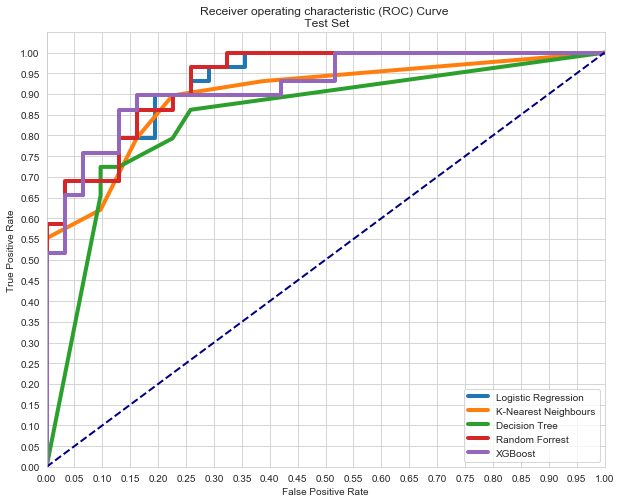

,Model,Train Accuracy,Test Accuracy,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall,AUC Score
0,Logistic Regression,0.89,0.83,0.87,0.82,0.91,0.85,0.83,0.79,0.931034
1,K-Nearest Neighbours,0.89,0.82,0.87,0.81,0.90,0.82,0.84,0.79,0.895996
2,Decision Tree,0.94,0.80,0.93,0.77,0.93,0.87,0.93,0.69,0.845940
3,Random Forrest,0.90,0.78,0.89,0.75,0.94,0.83,0.84,0.69,0.935484
4,XGBoost,0.97,0.85,0.96,0.84,0.97,0.86,0.95,0.83,0.919911


In [29]:
rscv_results = batch_clf(X_train_transformed, y_train, X_test_transformed, y_test, rscv_dict)
rscv_results

## Best Model

In [43]:
print('Base Model')
display(results[['Model', 'Test Accuracy', 'Test F1', 'Test Precision', 'Test Recall', 'AUC Score']])
print('Model Tuning')
display(rscv_results[['Model', 'Test Accuracy', 'Test F1', 'Test Precision', 'Test Recall', 'AUC Score']])

Base Model


,Model,Test Accuracy,Test F1,Test Precision,Test Recall,AUC Score
0,Logistic Regression,0.83,0.82,0.85,0.79,0.931034
1,K-Nearest Neighbours,0.80,0.79,0.81,0.76,0.894883
2,Decision Tree,0.75,0.74,0.75,0.72,0.749166
3,Random Forrest,0.80,0.78,0.84,0.72,0.927697
4,XGBoost,0.87,0.86,0.86,0.86,0.924360


Model Tuning


,Model,Test Accuracy,Test F1,Test Precision,Test Recall,AUC Score
0,Logistic Regression,0.83,0.82,0.85,0.79,0.931034
1,K-Nearest Neighbours,0.82,0.81,0.82,0.79,0.895996
2,Decision Tree,0.80,0.77,0.87,0.69,0.845940
3,Random Forrest,0.78,0.75,0.83,0.69,0.935484
4,XGBoost,0.85,0.84,0.86,0.83,0.919911


In [44]:
xgbclf = XGBClassifier()
xgbclf.fit(X_train_transformed, y_train)
training_preds = xgbclf.predict(X_train_transformed)
val_preds = xgbclf.predict(X_test_transformed)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

In [45]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, val_preds))

print(classification_report(y_test, val_preds))

[[27  4]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.86      0.86      0.86        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



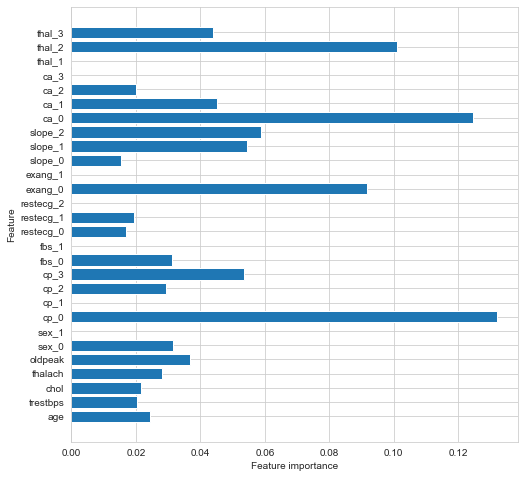

In [46]:
plot_feature_importances(xgbclf)

The most important features are chest pain type Asymptomatic and 0 number of major vessels colored by flourosopy. This is based off of the model XGBoost which produced the highest recall score. 

# Conclusion

To summarize everything above, we can see from above that to correctly classified a patient as having heart disease we need to consider the following features.

1) Gender of the individual - Males have a higher chance at having heart disease than females.

2) Asymptomatic Chest Pain - Individuals with this type of chest pain have a high chance of having heart disease

3) Reversible Defect - If the thalium stress result turns out to be reversable defect, the individual would have a high chance of having heart disease.

4) Age & Maximum Heart Rate - As you get older, your maximum heart rate goes down. We can see that individuals that have heart disease tend to be older and have a lower maximum heart rate. 

Our modeling shows that a regular XGBoost is the best model for our problem. This is because we want a model that generates a high recall value in order to minimize the chance of us classifying an individual as false negatives. We are classifying individuals with heart disease, if we classify someone with no heart disease and they do have it would be really bad. For other modelings that we did, please review the codes above.

Best Model for the following things:

* AUC - Random Forest with GridSearchCV

* Accuracy - XGBoost

* Precision - Decision Tree with GridSearchCV

* F1 Score - XGBoost

* Recall - XGBoost